In [2]:
# For data augmentation while data preprocessing
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# from keras.preprocessing.image import ImageDataGenerator

# Pretrained MobileNet model.
from tensorflow.keras.applications import MobileNetV2

# Performing MaxPooling operations
from tensorflow.keras.layers import MaxPooling2D

# For performing dropout operation
from tensorflow.keras.layers import Dropout

# For flattening operation
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense

# Input() is used to instantiate a Keras tensor.
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model

# We use adam optimizer
from tensorflow.keras.optimizers import Adam

# Preprocesses a tensor or Numpy array encoding a batch of images.
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input

# Converts a PIL Image instance to a Numpy array.
from tensorflow.keras.preprocessing.image import img_to_array

# Loads an image into PIL format.
from tensorflow.keras.preprocessing.image import load_img

# Converts a class vector (integers) to binary class matrix.
from tensorflow.keras.utils import to_categorical

# Binarize labels in a one-vs-all fashion.
from sklearn.preprocessing import LabelBinarizer

# Performing train-test split
from sklearn.model_selection import train_test_split

# For printing the metrics
from sklearn.metrics import classification_report

# For using strings in file structure path format
from imutils import paths

# For plotting losse functions
import matplotlib.pyplot as plt

# For performing mathematical computations
import numpy as np

# For file-related operations
import os

In [3]:
# # Path to directory containing data
# DataDir = "/data1a/"

# # Path to training directory
# train_dir = os.path.join(DataDir, 'training/')

# # Path to validation directory
# val_dir = os.path.join(DataDir, 'validation/')

# # Path for damaged training images
# train_damage = os.path.join(train_dir, '00-damage')
# # Path for training images not damaged
# train_not_damage = os.path.join(val_dir, '01-whole')

# # Number of damaged training images
# num_train_damage = len(os.listdir(train_damage))

# # Number of training images not damaged
# num_train_not_damage = len(os.listdir(train_not_damage))

# # Path for damaged validation
# val_damage = os.path.join(val_dir, '00-damage')

# # Path for validation images not damaged
# val_not_damage = os.path.join(val_dir, '01-whole')

# # Number of damaged validation images
# num_val_damage = len(os.listdir(val_damage))

# # Number of validation images not damaged
# num_val_not_damage = len(os.listdir((val_not_damage)))

# # Number of training images
# num_train = num_train_damage + num_train_not_damage

# # Number of validation images
# num_val = num_val_damage + num_val_not_damage


# # Total images
# total_images = num_val + num_train
# print("Total training images",num_train)
# print("Total training images (Damaged)", num_train_damage)
# print("Total training images (Damaged)", num_train_not_damage)
# print()

# print("Total validation images", num_val)
# print("Total training images (Damaged)", num_val_damage)
# print("Total training images (Damaged)", num_val_not_damage)
# print()

# print("Total Number of Images: ",total_images)

# # Plotting a sample image
# plt.grid('')
# # image = plt.imread('/kaggle/input/car-damage-detection/data1a/training/01-whole/0195.jpg')
# image = plt.imread('data1a/training/01-whole/0195.jpg')
# plt.imshow(image)
# plt.show()

Total training images: 1840
 - Damaged: 920
 - Not Damaged: 920

Total validation images: 460
 - Damaged: 230
 - Not Damaged: 230

Total number of images: 2300


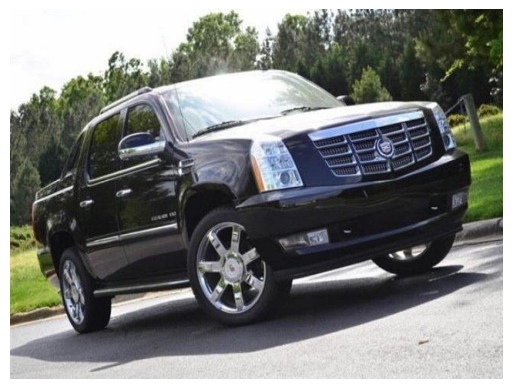

In [4]:
import os
import matplotlib.pyplot as plt

# Adjust this path to your actual dataset folder location
DataDir = "data1a"  # Relative path without trailing slash

# Training and validation directories
train_dir = os.path.join(DataDir, 'training')
val_dir = os.path.join(DataDir, 'validation')

# Paths for damaged and not damaged images in training and validation sets
train_damage = os.path.join(train_dir, '00-damage')
train_not_damage = os.path.join(train_dir, '01-whole')  # fixed to training

val_damage = os.path.join(val_dir, '00-damage')
val_not_damage = os.path.join(val_dir, '01-whole')

# Count images in each folder
num_train_damage = len(os.listdir(train_damage))
num_train_not_damage = len(os.listdir(train_not_damage))
num_val_damage = len(os.listdir(val_damage))
num_val_not_damage = len(os.listdir(val_not_damage))

num_train = num_train_damage + num_train_not_damage
num_val = num_val_damage + num_val_not_damage
total_images = num_train + num_val

# Print counts
print("Total training images:", num_train)
print(" - Damaged:", num_train_damage)
print(" - Not Damaged:", num_train_not_damage)
print()
print("Total validation images:", num_val)
print(" - Damaged:", num_val_damage)
print(" - Not Damaged:", num_val_not_damage)
print()
print("Total number of images:", total_images)

# Plotting a sample image
plt.grid(False)

sample_img_path = os.path.join(train_not_damage, '0195.jpg')
image = plt.imread(sample_img_path)
plt.imshow(image)
plt.axis('off')  # Hide axes for better visualization
plt.show()


playground.tensorflow.com

In [5]:
# initializing the hyperparameters
initial_lr = 0.001
epochs = 100
batch_size = 64

# Classes which are detected
classes = ["00-damage", "01-whole"]

In [ ]:
# grab the list of images in our dataset directory, then initialize
# the list of data (i.e., images) and class images
print("[INFO] loading images...")

# It stores the data or feature set
data = []

# It stores the corrosponding labels
labels = []

for class_ in classes:
    path = os.path.join(train_dir, class_)
    for image in os.listdir(path):
        image_path = os.path.join(path, image)
        image_ = load_img(image_path, target_size=(224, 224))  # FIXED
        image_ = img_to_array(image_)
        image_ = preprocess_input(image_)

        data.append(image_)
        labels.append(class_)



for class_ in classes:
	path = os.path.join(val_dir, class_)
	for image in os.listdir(path):
		image_path = os.path.join(path, image)
		image_ = load_img(image_path, target_size=(224, 224))
		image_ = img_to_array(image_)
		image_ = preprocess_input(image_)

		data.append(image_)
		labels.append(class_)

# perform one-hot encoding on the labels
lb = LabelBinarizer()
labels = lb.fit_transform(labels)
labels = to_categorical(labels)

data = np.array(data, dtype="float32")
labels = np.array(labels)



(trainX, testX, trainY, testY) = train_test_split(data, labels,
	test_size=0.20, stratify=labels, random_state=42)
# construct the training image generator for data augmentation

aug = ImageDataGenerator(
	rotation_range=20,
	zoom_range=0.15,
	width_shift_range=0.2,
	height_shift_range=0.2,
	shear_range=0.15,
	horizontal_flip=True,
	fill_mode="nearest")

[INFO] loading images...


In [ ]:
# loading the MobileNetV2 network, ensuring the topmost fully-connected
# layer sets are left off
model_base = MobileNetV2(weights="imagenet", include_top=False,
	input_tensor=Input(shape=(224, 224, 3)))

# Constructing the top architecture of our model, which is placed over the
# pretrained model
model_head = model_base.output
# MaxPooling layer

model_head = MaxPooling2D(pool_size=(5, 5))(model_head)
# Flatten layer
model_head = Flatten(name="flatten")(model_head)

# Activation function relu
model_head = Dense(128, activation="relu")(model_head)

# Performing dropout
model_head = Dropout(0.5)(model_head)

# Final output layer consists of softmax layer
model_head = Dense(2, activation="softmax")(model_head)

# place the head FC model on top of the base model (this will become
# the actual model we will train)
model_final = Model(inputs=model_base.input, outputs=model_head)

C:\Users\prana\AppData\Local\Temp\ipykernel_2788\2213120574.py:3: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  model_base = MobileNetV2(weights="imagenet", include_top=False,


In [8]:
# looping over all the layers and setting each individual layer trainability
# to false.
for layer in model_base.layers:
	layer.trainable = False

In [9]:
# Setting optimizer to Adam
optim = Adam(learning_rate=initial_lr)

# Compiling our model
model_final.compile(loss="binary_crossentropy", optimizer=optim,
        metrics=["accuracy"])

In [10]:
# train the head of the network
model_train = model_final.fit(
#     Generates image generator from ImageGeneratorClass for inputing images in batches
	aug.flow(trainX, trainY, batch_size=batch_size),
#     Number of steps to be taken in one epoch over image batches
	steps_per_epoch=len(trainX) // batch_size,
#     Validation data
	validation_data=(testX, testY),

#     Steps for validation data
	validation_steps=len(testX) // batch_size,

#     Number of epochs
	epochs=100)

c:\Users\prana\OneDrive\Desktop\4trimester\Specialisation\venv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - accuracy: 0.6906 - loss: 1.1976 - val_accuracy: 0.7870 - val_loss: 0.4694
Epoch 2/100
 1/28 ━━━━━━━━━━━━━━━━━━━━ 18s 682ms/step - accuracy: 0.7344 - loss: 0.5067

c:\Users\prana\OneDrive\Desktop\4trimester\Specialisation\venv\Lib\site-packages\keras\src\trainers\epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


28/28 ━━━━━━━━━━━━━━━━━━━━ 6s 191ms/step - accuracy: 0.7344 - loss: 0.5067 - val_accuracy: 0.7935 - val_loss: 0.4639
Epoch 3/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 37s 1s/step - accuracy: 0.8209 - loss: 0.3915 - val_accuracy: 0.7891 - val_loss: 0.4316
Epoch 4/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 6s 192ms/step - accuracy: 0.8438 - loss: 0.4043 - val_accuracy: 0.8043 - val_loss: 0.4114
Epoch 5/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 39s 1s/step - accuracy: 0.8562 - loss: 0.3637 - val_accuracy: 0.8500 - val_loss: 0.3219
Epoch 6/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 7s 216ms/step - accuracy: 0.8906 - loss: 0.2882 - val_accuracy: 0.8435 - val_loss: 0.3346
Epoch 7/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 39s 1s/step - accuracy: 0.8547 - loss: 0.3584 - val_accuracy: 0.8543 - val_loss: 0.3178
Epoch 8/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 8s 269ms/step - accuracy: 0.8906 - loss: 0.3771 - val_accuracy: 0.8370 - val_loss: 0.3263
Epoch 9/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 53s 2s/step - accuracy: 0.8787 - loss: 0.3156 - val_accuracy: 0.8413 - val_l

In [16]:
# Predict on test set
predict = model_final.predict(testX, batch_size=batch_size)

# Get predicted class indices
predict_index = np.argmax(predict, axis=1)

# Classification report
print(classification_report(testY.argmax(axis=1), predict_index,
                            target_names=lb.classes_))

# Save model
model_final.save("damage_detection.h5")


8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 388ms/step


              precision    recall  f1-score   support

   00-damage       0.93      0.83      0.88       230
    01-whole       0.84      0.94      0.89       230

    accuracy                           0.88       460
   macro avg       0.89      0.88      0.88       460
weighted avg       0.89      0.88      0.88       460



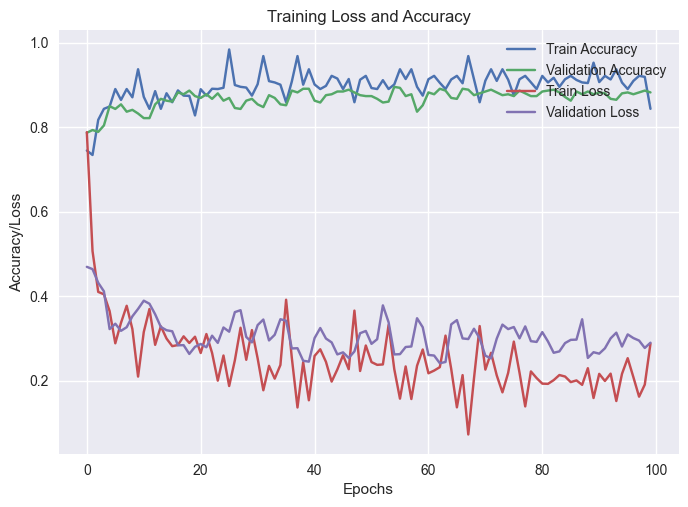

In [13]:
# plotting training loss and accuracy
# Get the number of epochs from the training history
num = len(model_train.history["accuracy"])

# matplotlib style
plt.style.use("seaborn-v0_8")
plt.figure()

# Plotting all the required quantities
# Train Accuracy
plt.plot(np.arange(0, num), model_train.history["accuracy"], label="Train Accuracy")

# Validation Accuracy
plt.plot(np.arange(0, num), model_train.history["val_accuracy"], label="Validation Accuracy")

# Train Loss
plt.plot(np.arange(0, num), model_train.history["loss"], label="Train Loss")

# Validation Loss
plt.plot(np.arange(0, num), model_train.history["val_loss"], label="Validation Loss")

# Setting the title
plt.title("Training Loss and Accuracy")

# Setting the label
plt.xlabel("Epochs")
plt.ylabel("Accuracy/Loss")
plt.legend(loc="upper right")

# Saving the Model
plt.savefig("Car_Detection.png")

In [ ]:
augment 